# Final Comparison - Benchmarking
I will use two metrics for comparison: the mean Average Error (MAE) and the  of all of the models. A final visualization of bar charts will summarize the results of the test error.


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_axes_aligner

In [2]:
r_knn = pd.DataFrame(np.load('results_KnnReg.npy'))
r_rf = pd.DataFrame(np.load('results_RandomForest.npy'))
r_elastic = pd.DataFrame(np.load('results_ElasticNet.npy'))
r_baseline_avg = pd.DataFrame(np.load('results_baseline_avg.npy'))
r_baseline_lag = pd.DataFrame(np.load('results_baseline_lag.npy'))
r_cnn = pd.DataFrame(np.load('results_CNNs.npy'))


In [3]:
results = pd.concat([r_baseline_avg, r_baseline_lag, r_knn, r_rf, r_elastic, r_cnn], axis = 0, ignore_index = True)

In [4]:
results

,0,1,2
0,baseline_avg,0,78.7703
1,baseline_lag,0.942308,12.3662
2,KnnReg,0.853902,23.8115
3,RandomForest,0.863111,26.6579
4,ElasticNet,0.315957,38.7834
5,CNN,-0.025321,60.7594


In [5]:
cols = ['model', 'r2', 'mae']
results.columns = cols
results

,model,r2,mae
0,baseline_avg,0,78.7703
1,baseline_lag,0.942308,12.3662
2,KnnReg,0.853902,23.8115
3,RandomForest,0.863111,26.6579
4,ElasticNet,0.315957,38.7834
5,CNN,-0.025321,60.7594


In [6]:
titles = ['baseline_avg', 'baseline_lag','k-NNReg', 'RandomForest', 'ElasticNet', 'CNN']
xcor = np.arange(len(results.mae))

I will now do a benchmarking of the various models and compare the results.

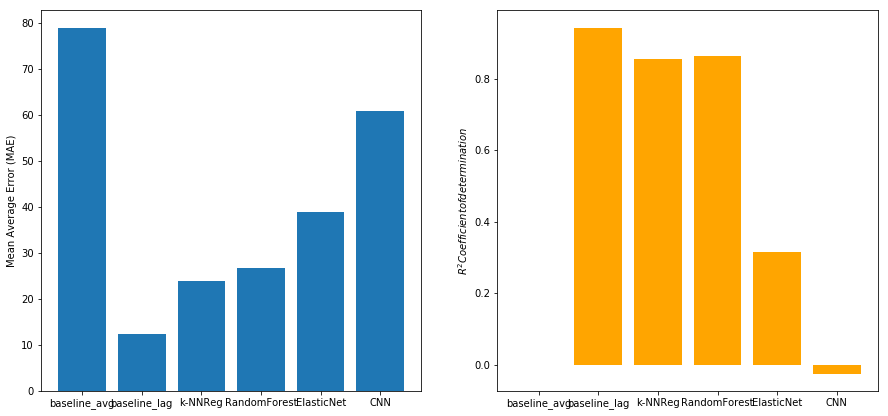

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,7))
ax1.bar(xcor, results.mae)
ax1.set_xticks(xcor)
ax1.set_xticklabels(titles)
ax1.set_ylabel('Mean Average Error (MAE)')
ax2.bar(xcor, results.r2, color = 'orange')
ax2.set_xticks(xcor)
ax2.set_xticklabels(titles)
ax2.set_ylabel('$R^2 Coefficient of determination$')
plt.show()

Surprisingly, the CNN model did not perform well at all a bit better than the Average baseline. The lag-baseline wins in this case.

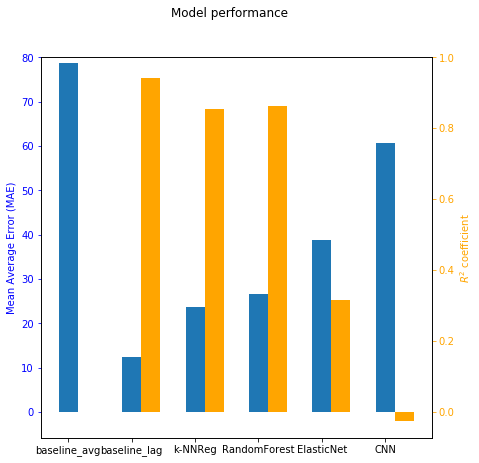

In [19]:
width = 0.3
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7,7))
plt.suptitle('Model performance')
ax.bar(xcor, results.mae, width)
ax.set_xticks(xcor)
ax.set_xticklabels(titles)
ax.set_ylabel('Mean Average Error (MAE)', color = 'blue')
ax.tick_params('y', colors = 'blue')
ax.set_ylim(-5.8,80)
# mpl_axes_aligner.align.yaxes(ax1, 0, ax2, 0, 0.9)
ax2 = ax.twinx()
ax2.bar(xcor+width, results.r2, width, color = 'orange')
ax2.set_xticks(xcor)
ax2.set_xticklabels(titles)
ax2.tick_params('y', colors = 'orange')
ax2.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1])
ax2.set_ylabel('$R^2$ coefficient', color = 'orange')
plt.show()

The best performance is achieved with the baseline_lag model. This is indicated by both metrics (smallest MAE and R2 --> 1). This is expected due to high autocorrelation that was observed in the EDA. The ML model with the best performance was the kNRegressor. 

comparing the residuals

In [9]:
p_knn = pd.read_pickle('KNRegressor_predictions.csv')
p_elastic = pd.read_pickle('ElasticNet_predictions.csv')
p_rf = pd.read_pickle('RandomForest_predictions.csv')
p_cnn = pd.read_pickle('CNNs_predictions.csv')
predictions = pd.concat([p_knn, p_elastic, p_rf, p_cnn], axis = 0, ignore_index = True)

In [10]:
p_knn.head()

,PM2.5,PM2.5 - prediction,Residuals
Date and Time,,,
2016-09-01 00:00:00,12.0,11.000000,1.000000
2016-09-01 01:00:00,17.0,7.670028,9.329972
2016-09-01 02:00:00,3.0,8.000000,-5.000000
2016-09-01 03:00:00,8.0,7.000000,1.000000
2016-09-01 04:00:00,14.0,10.000000,4.000000


In [11]:
p_elastic.head()

,PM2.5,PM2.5 - prediction,Residuals
Date and Time,,,
2016-09-01 00:00:00,12.0,17.0,-5.0
2016-09-01 01:00:00,17.0,15.0,2.0
2016-09-01 02:00:00,3.0,16.0,-13.0
2016-09-01 03:00:00,8.0,13.0,-5.0
2016-09-01 04:00:00,14.0,16.0,-2.0


In [12]:
p_rf.head()

,PM2.5,PM2.5 - prediction,Residuals
Date and Time,,,
2016-09-01 00:00:00,12.0,9.0,3.0
2016-09-01 01:00:00,17.0,10.0,7.0
2016-09-01 02:00:00,3.0,13.0,-10.0
2016-09-01 03:00:00,8.0,8.0,0.0
2016-09-01 04:00:00,14.0,9.0,5.0


In [13]:
p_cnn.head()

,PM2.5,PM2.5 - prediction,Residuals
Date and Time,,,
2016-09-01 00:00:00,12.0,8.482246,3.517754
2016-09-01 01:00:00,17.0,8.482246,8.517754
2016-09-01 02:00:00,3.0,9.000000,-6.000000
2016-09-01 03:00:00,8.0,8.482246,-0.482246
2016-09-01 04:00:00,14.0,8.482246,5.517754


In [14]:
predictions = pd.concat([p_knn, p_elastic, p_rf, p_cnn], axis = 1, ignore_index = True)
predictions.head()

,0,1,2,3,4,5,6,7,8,9,10,11
Date and Time,,,,,,,,,,,,
2016-09-01 00:00:00,12.0,11.000000,1.000000,12.0,17.0,-5.0,12.0,9.0,3.0,12.0,8.482246,3.517754
2016-09-01 01:00:00,17.0,7.670028,9.329972,17.0,15.0,2.0,17.0,10.0,7.0,17.0,8.482246,8.517754
2016-09-01 02:00:00,3.0,8.000000,-5.000000,3.0,16.0,-13.0,3.0,13.0,-10.0,3.0,9.000000,-6.000000
2016-09-01 03:00:00,8.0,7.000000,1.000000,8.0,13.0,-5.0,8.0,8.0,0.0,8.0,8.482246,-0.482246
2016-09-01 04:00:00,14.0,10.000000,4.000000,14.0,16.0,-2.0,14.0,9.0,5.0,14.0,8.482246,5.517754


In [15]:
predictions = pd.concat([p_knn, p_elastic, p_rf, p_cnn], axis = 1, ignore_index = True)
residuals = predictions.drop(columns = [0,1,3,4,6,7, 9, 10])
cols = ['kNRegressor', 'ElasticNet', 'RandomForest', 'CNN']
residuals.columns = cols

In [16]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [17]:
font_dict = {'fontname':'Arial', 'size':'16'}

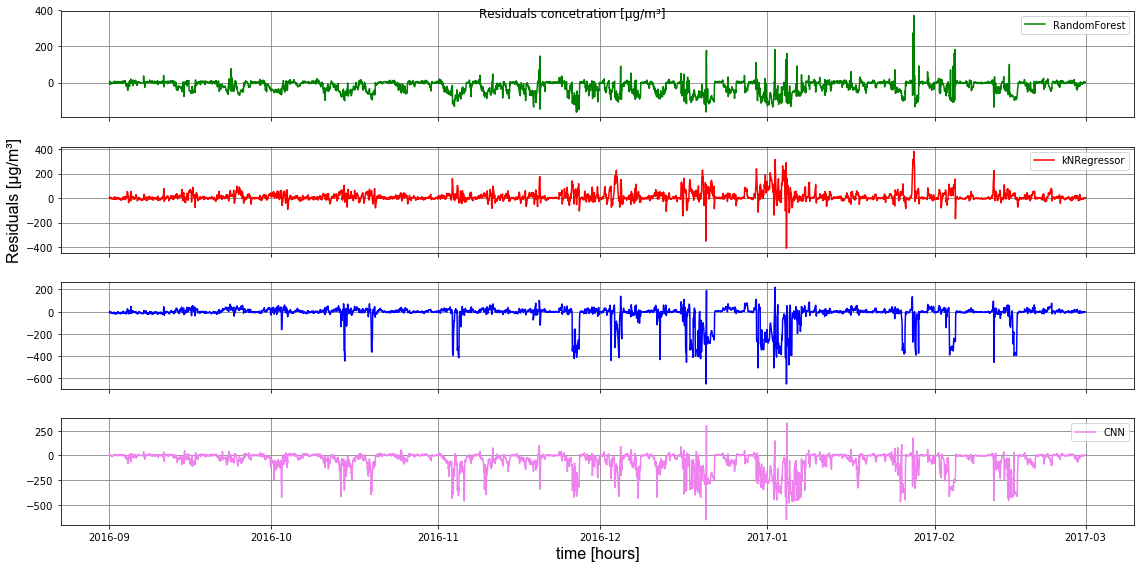

In [19]:
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (16, 8), sharex = True)
#for estimator, ax in zip(estimators, axes.ravel()):
#ax[0].plot(residuals['RandomForest'], color = 'green', label = 'RandomForest')
plt.grid(True)
ax[0].plot(residuals['RandomForest'], color = 'green', label = 'RandomForest')
ax[0].grid(True)
ax[0].legend(loc = 'upper right')
ax[1].plot(residuals['kNRegressor'], color = 'red', label = 'kNRegressor')
ax[1].grid(True)
ax[1].legend(loc = 'upper right')
ax[1].set_ylabel('Residuals [µg/m³]', fontdict = font_dict)
ax[2].grid(True)
ax[2].plot(residuals['ElasticNet'], color = 'blue', label = 'ElasticNet')
ax[3].grid(True)
ax[3].plot(residuals['CNN'], color = 'violet', label = 'CNN')
plt.xlabel('time [hours]', fontdict = font_dict)
plt.suptitle('Residuals concetration [µg/m³]')
plt.legend(loc = 'upper right')
plt.tight_layout()

for ax in fig.get_axes():
    ax.label_outer()

Observing the residuals I come to the conclusion that the kNRegressor has the best fit. Its residuals are the minimum values compared with the rest of the cases. Moreover, in all the rest of the cases the residual values have mostly negative values which means overestimation.

General Comments:
- the 1DConvolution is convolution shifting the filter in one dimention (thus 1D), the feature dimention (not the time dimention). 2D Convolution is shifting the filter in 2 dimentions (the filter may have 3 dimentions 4x4x3, but in this case we would not shift in depth). Normally we do 2D on spatial and 1D for temporal case. In this case the 1D Convolution makes sense only for the lag features, not the rest of the features that is why the CNN does not perform well.
- Checking the length (size) of each validation set of k-fold is important. We can do it with test_size.
- we could increase the length of the test set to one year instead of 6 months to profit from the seasonality of the whole year.
- Important Note: we cannot compare the MAE of the test set with those of the validation curves because in the cas of the validation curves we have transformed the data with the quantile transformation. for these validation curves the data and the target are quantile transformed. On the case of the test set, the MAE error is being calculated when the result is transformed back from the quantile transformation to the original scale. So they are not comparable.
    